In [ ]:
ls

In [ ]:
cd notebook

In [ ]:
ls output/

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import json
from pandas.io.json import json_normalize
import collections
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap as Basemap

us = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia",
"Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
"Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire",
"New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon",
"Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia",
"Washington","West Virginia","Wisconsin","Wyoming"]
us_lower = [x.lower() for x in us]
PLOT_WIDTH = 12
PLOT_HEIGHT = 6.9
BLUE_M = "#85C1E9"
GREEN_M = "#45b39d"
def plot_map(ax, data,vmin=0, vmax=100,cmap=plt.cm.GnBu_r ):
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    #read shape information
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    colors={}
    statenames=[]    
    # setup the colorbar
    cmap = cmap #plt.cm.GnBu_r 
    normalize = mcolors.Normalize(vmin=vmin, vmax=vmax)    
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
    scalarmappaple.set_array([])
    
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        statenames.append(statename)
        if statename not in ['Alaska','Puerto Rico']:
            try:    
                pop = data[statename.lower()]
                #print statename, " > ", pop
                colors[statename] = cmap(normalize(pop))
            except (IndexError, KeyError):
                print("skipping " + statename)
                continue        
            
    # cycle through state names, color each one.
    for nshape,seg in enumerate(m.states):
        if statenames[nshape] not in ['Alaska','Puerto Rico']:
            try:
                color = rgb2hex(colors[statenames[nshape]]) 
                poly = Polygon(seg,facecolor=color,edgecolor=color)
                ax.add_patch(poly)
            except (IndexError, KeyError):
    #            print "skipping ", statenames[nshape]
                continue
    return ax, scalarmappaple



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data = pd.read_csv("../pipelines/ecigs/stats/reddit_geo_state_count.csv", index_col='state')

In [18]:
# By state

{'north carolina': 0.015047051355539364, 'texas': 0.029679223956829155, 'district of columbia': 0.001987899614001498, 'maine': 0.0034289802338860653, 'louisiana': 0.008645017716642209, 'washington': 0.15546225263037527, 'wisconsin': 0.010596267264013887, 'oregon': 0.008772559948513987, 'virginia': 0.007357867376602891, 'massachusetts': 0.012217666211717174, 'kansas': 0.00126222829473104, 'mississippi': 0.00020084236513141982, 'west virginia': 0.0008825336044460929, 'ohio': 0.1606621640838143, 'new hampshire': 0.0016800390543110007, 'north dakota': 0.0003943547169368754, 'pennsylvania': 0.2886280707258326, 'nevada': 0.005154465370818044, 'california': 0.0635820015920789, 'arizona': 0.009759179742188772, 'colorado': 0.018396867445505016, 'new jersey': 0.01688835070302158, 'wyoming': 2.3456042643085525e-05, 'tennessee': 0.012239656251695066, 'delaware': 0.0006611672020019732, 'arkansas': 0.0031826917861336674, 'new mexico': 0.0013677804866249247, 'indiana': 0.016161213381085927, 'south ca

Text(0.5, 0.98, 'Location')

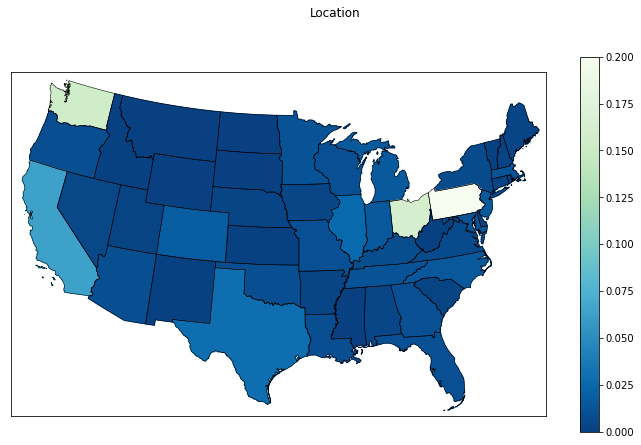

In [22]:
#lowercase state names
# data["location-state"] = [x.lower() for x in data["location-state"]]
# states = data[data["location-state"].isin(us_lower)]
# states = states.groupby(['location-state']).size()
states = {}
sum_count = sum(data['num_user'])
for state in data.index.values:
    if state not in us:
        print(state)
    states[state.lower()] = data.loc[state, 'num_user']/sum_count
print(states)
fig, a = plt.subplots(nrows=1, ncols=1,figsize=(PLOT_WIDTH,PLOT_HEIGHT))
ax, cbar = plot_map(a,states,vmax=0.2)
plt.colorbar(cbar)
plt.suptitle("Location")